# AUTOREGRESSIVE MODEL


$
y_t = c + \phi_1 y_{t-1} + \phi_2 y_{t-2} + ... + \phi_p y_{t-p} + \epsilon_t ,
$


### MODULES

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.ar_model import AutoReg

### LOAD DATA

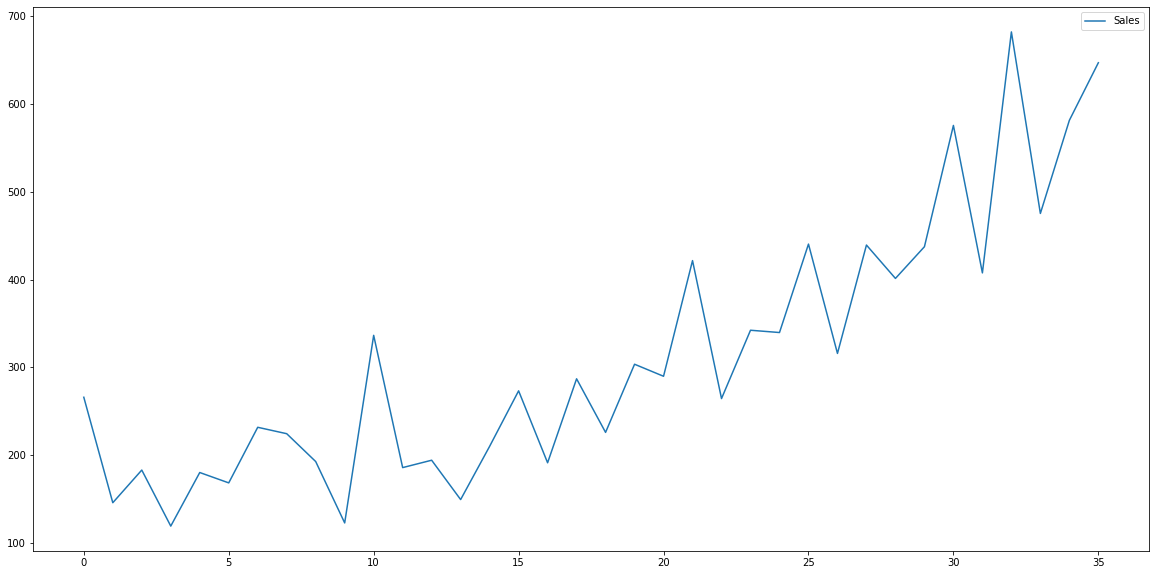

In [2]:
df = pd.read_csv("shampoo_sales.csv", usecols=["Sales"])
df.plot(figsize=(20, 10))

### STATIONARITY

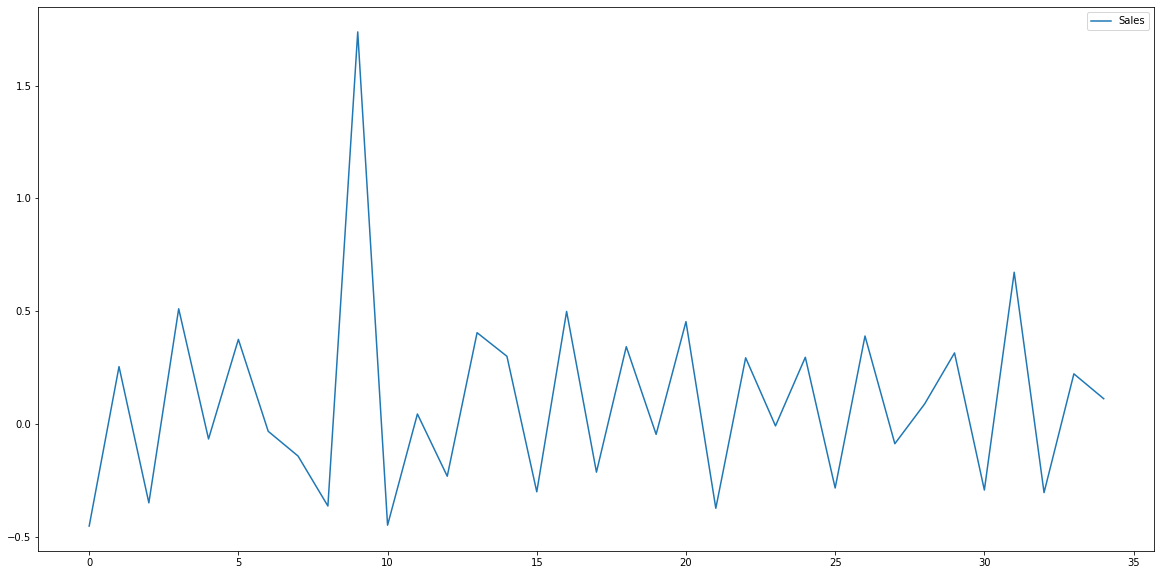

In [3]:
df["Sales"] = df["Sales"].pct_change()
df = df.dropna().reset_index(drop=True)
df.plot(figsize=(20, 10))

### SPLIT DATA

In [4]:
train, test = df.iloc[:-6], df.iloc[-6:]
train.shape, test.shape, train.index[-1], test.index[0]

((29, 1), (6, 1), 28, 29)

### MODEL

In [5]:
mod = AutoReg(train, 6, old_names=False)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   29
Model:                     AutoReg(6)   Log Likelihood                  -4.844
Method:               Conditional MLE   S.D. of innovations              0.299
Date:                Sun, 31 Jan 2021   AIC                             -1.721
Time:                        20:43:04   BIC                             -1.326
Sample:                             6   HQIC                            -1.622
                                   29                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5170      0.171      3.026      0.002       0.182       0.852
Sales.L1      -0.9959      0.211     -4.710      0.000      -1.410      -0.581
Sales.L2      -0.9158      0.296     -3.096      0.002      -1.496      -0.336
Sales.L3      -0.9013      0.338     -2.667      0.008      -1.564      -0.239
Sales.L4      -0.4584      0.332     -1.383      0.167      -1.108       0.191
Sales.L5      -0.2358      0.285     -0.827      0.408      -0.795       0.323
Sales.L6      -0.0733      0.198     -0.370      0.711      -0.461       0.314
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            0.3859           -1.2691j            1.3264           -0.2030
AR.2            0.3859           +1.2691j            1.3264            0.2030
AR.3           -0.2949           -1.6442j            1.6704           -0.2782
AR.4           -0.2949           +1.6442j            1.6704            0.2782
AR.5           -2.0322           -0.0000j            2.0322           -0.5000
AR.6           -1.3678           -0.0000j            1.3678           -0.5000
-----------------------------------------------------------------------------
"""

### EVALUATION

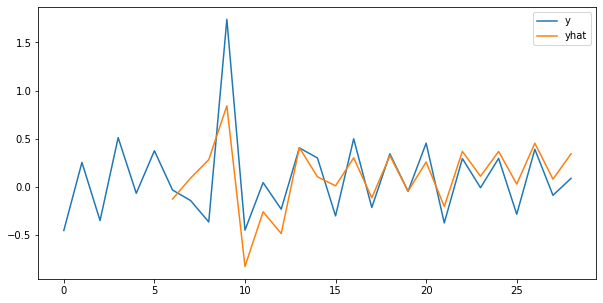

In [6]:
fig, ax = plt.subplots(1, figsize=(10, 5))

ax.plot(train, label="y")
ax.plot(res.predict(), label="yhat")
ax.legend()
plt.show()

### PREDICT

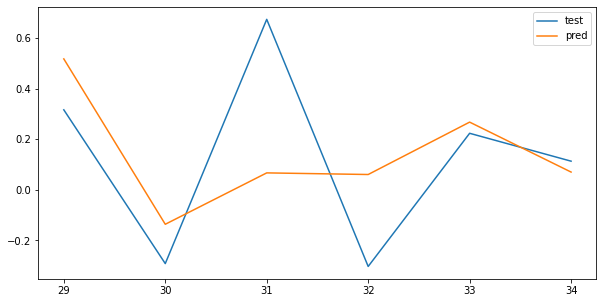

In [7]:
pred = res.predict(start=test.index[0], end=test.index[-1], dynamic=True)
fig, ax = plt.subplots(1, figsize=(10, 5))
ax.plot(test, label="test")
ax.plot(pred, label="pred")
ax.legend()
plt.show()